# Drive/Git setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/ELE538B/Final"

Mounted at /content/drive
/content/drive/My Drive/ELE538B/Final


In [ ]:
%cd generalization

/content/drive/My Drive/ELE538B/Final/generalization


In [ ]:
!git clone https://github.com/mpsenka21/generalization
%cd generalization
# after running this, need to move CIFAR-10 folder
# and ideally move it back once done
# or just nvm lol

In [ ]:
%cd "/content/drive/My Drive/ELE538B/Final"
!rm -r generalization
!git clone https://github.com/mpsenka21/generalization
%cd generalization

/content/drive/My Drive/ELE538B/Final
Cloning into 'generalization'...
remote: Enumerating objects: 176, done.
remote: Counting objects: 100% (176/176), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 514 (delta 92), reused 135 (delta 53), pack-reused 338
Receiving objects: 100% (514/514), 9.91 MiB | 7.02 MiB/s, done.
Resolving deltas: 100% (269/269), done.
/content/drive/My Drive/ELE538B/Final/generalization


In [ ]:
!git pull

remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 13 (delta 7), reused 13 (delta 7), pack-reused 0
Unpacking objects: 100% (13/13), done.
From https://github.com/mpsenka21/generalization
   7af4193..b3c51ca  master     -> origin/master
Updating 7af4193..b3c51ca
error: Your local changes to the following files would be overwritten by merge:
	Xt.pt
	Yt.pt
	main.py
	results/config.json
Please commit your changes or stash them before you merge.
Aborting


# Testing results from full_results in git, first run

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%cd generalization/full_results

/content/drive/My Drive/ELE538B/Final/generalization/full_results


In [5]:
df = pd.read_csv('results.csv', index_col=0)

In [9]:
df['epoch'] = df['epoch'].astype(int)

In [11]:
df.head()

,epoch,train_loss,train_acc,doublesum_train,doublesum_eval,doublesum_eval2,taylor_base,taylor_de,taylor_d2_1,taylor_d2_2,taylor_d2_5,taylor_d2_20,taylor_d2_50,taylor_d2_200,taylor_d2e_1,taylor_d2e_2,taylor_d2e_5,taylor_d2e_20,taylor_d2e_50,taylor_d2e_200,test_loss,test_acc
0,1,1.043995,0.791783,0.790181,0.796808,0.793621,1.256183,-0.112477,-0.005767,-0.011410,-0.022124,-0.043134,-0.061313,-0.074300,-0.039525,-0.047635,-0.033926,-0.022021,-0.008775,0.000582,0.141895,0.9694
1,2,0.768871,0.856967,0.724840,0.732549,0.732111,1.275488,-0.141290,-0.009224,-0.024072,-0.048941,-0.097518,-0.141453,-0.172257,-0.068916,-0.083146,-0.064992,-0.047292,-0.025300,-0.010814,0.135613,0.9718
2,3,0.713727,0.858767,0.678707,0.688264,0.687506,1.310212,-0.163513,-0.026490,-0.046473,-0.086761,-0.157598,-0.221991,-0.264671,-0.103714,-0.125191,-0.100901,-0.074761,-0.045297,-0.025087,0.095548,0.9797
3,4,0.680851,0.863667,0.660563,0.673676,0.670815,1.362791,-0.169037,-0.040586,-0.069553,-0.127324,-0.235532,-0.334729,-0.407802,-0.129045,-0.155744,-0.126704,-0.103358,-0.065730,-0.035550,0.114373,0.9760
4,5,0.661270,0.862967,0.634646,0.642430,0.644471,1.411475,-0.169395,-0.071016,-0.105745,-0.178261,-0.319355,-0.447864,-0.536304,-0.153266,-0.181111,-0.151022,-0.128459,-0.089433,-0.061841,0.094069,0.9790


doublesum approximation

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


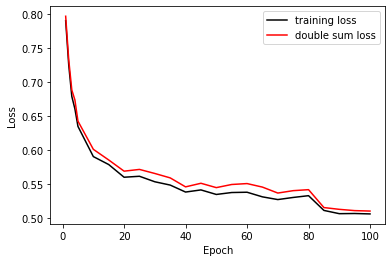

In [15]:
plt.plot(df['epoch'], df['doublesum_train'], color='k', label='training loss')
plt.plot(df['epoch'], df['doublesum_eval'], color='r', label='double sum loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('doublesum.eps')
plt.show()

SVD approximation

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


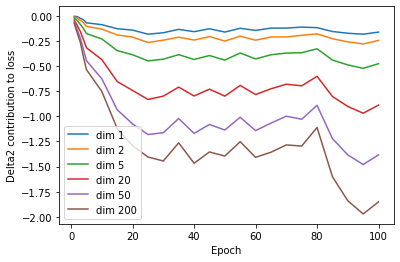

In [17]:
plt.plot(df['epoch'], df['taylor_d2_1'], label='dim 1')
plt.plot(df['epoch'], df['taylor_d2_2'], label='dim 2')
plt.plot(df['epoch'], df['taylor_d2_5'], label='dim 5')
plt.plot(df['epoch'], df['taylor_d2_20'], label='dim 20')
plt.plot(df['epoch'], df['taylor_d2_50'], label='dim 50')
plt.plot(df['epoch'], df['taylor_d2_200'], label='dim 200')
plt.xlabel('Epoch')
plt.ylabel('Delta2 contribution to loss')
plt.legend()
plt.savefig('taylor_d2_svd.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


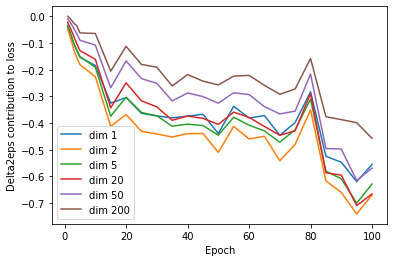

In [19]:
plt.plot(df['epoch'], df['taylor_d2e_1'], label='dim 1')
plt.plot(df['epoch'], df['taylor_d2e_2'], label='dim 2')
plt.plot(df['epoch'], df['taylor_d2e_5'], label='dim 5')
plt.plot(df['epoch'], df['taylor_d2e_20'], label='dim 20')
plt.plot(df['epoch'], df['taylor_d2e_50'], label='dim 50')
plt.plot(df['epoch'], df['taylor_d2e_200'], label='dim 200')
plt.xlabel('Epoch')
plt.ylabel('Delta2eps contribution to loss')
plt.legend()
plt.savefig('taylor_d2e_svd.eps')
plt.show()

# the noise in this figure makes me think we should evaluate everything on 5 batches
# and maybe record numbers at every epoch

Role of individual pieces of the taylor expansion

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


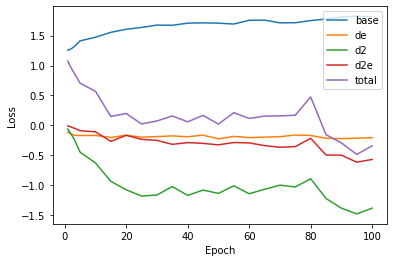

In [25]:
plt.plot(df['epoch'], df['taylor_base'], label='base')
plt.plot(df['epoch'], df['taylor_de'], label='de')
plt.plot(df['epoch'], df['taylor_d2_50'], label='d2')
plt.plot(df['epoch'], df['taylor_d2e_50'], label='d2e')
plt.plot(df['epoch'], df['taylor_base'] + df['taylor_de'] + df['taylor_d2_50'] + df['taylor_d2e_50'], label='total')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('individual_taylor_terms (50 components).eps')
plt.show()

Comparing the three losses

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


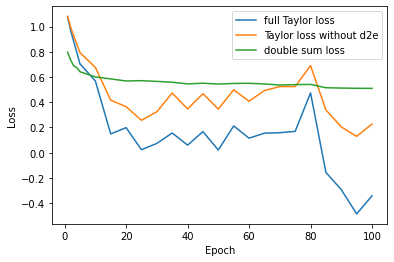

In [28]:
plt.plot(df['epoch'], df['taylor_base'] + df['taylor_de'] + df['taylor_d2_50'] + df['taylor_d2e_50'], label='full Taylor loss')
plt.plot(df['epoch'], df['taylor_base'] + df['taylor_de'] + df['taylor_d2_50'], label='Taylor loss without d2e')
plt.plot(df['epoch'], df['doublesum_eval'], label='double sum loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('comparing losses (50 components).eps')
plt.show()